## Дисциплина "Моделирование природных процессов в океане"
## Лабораторная работа №1
### ИССЛЕДОВАНИЕ РЕАКЦИИ СИСТЕМЫ ОКЕАН - АТМОСФЕРА НА ВНЕШНЕЕ ПОСТОЯННОЕ ВОЗМУЩЕНИЕ

Цель:
- Исследование изменения температуры поверхности (температуры приземного слоя атмосферы), создаваемые возмущениями солнечной постоянной или концентрации активных в радиационном отношении газов (таких, как СО2) с помощью простейшей нульмерной модели системы океан— атмосфера.

- Получение практических навыков численного решения системы обыкновенных дифференциальных уравнений методом Рунге-Кутта.

- Получение навыков реализации программного кода на языке Python в интерактивной облачной среде Google Colaboratory 
 

**Описание работы см. в Лабораторном практикуме: Взаимодействие океана и атмосферы. Л.: Гидрометеоиздат, 1989., на стр. 142, Практическая работа № 2**

## © *Софьина Е.В. 25.03.2023*

INVESTIGACIÓN DE LA RESPUESTA DEL SISTEMA OCÉANO-ATMOSFERA A UNA PERTURBACIÓN EXTERNA CONSTANTE  
Objetivo:

Investigación de cambios en la temperatura de la superficie (temperatura de la capa superficial de la atmósfera) creados por perturbaciones de la constante solar o la concentración de gases radiativamente activos (como el CO2) utilizando el modelo de dimensión cero más simple del sistema océano-atmósfera.

Obtención de habilidades prácticas en la solución numérica de un sistema de ecuaciones diferenciales ordinarias por el método de Runge-Kutta.

Adquirir habilidades en la implementación del código Python en el entorno de nube interactivo de Google Colaboratory

Para una descripción del trabajo, ver Taller de Laboratorio: Interacción Océano-Atmósfera. L .: Gidrometeoizdat, 1989., en la página 142, Trabajo práctico No. 2

Импорт модулей  


Importar módulos

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Параметры

Parámetros

In [12]:
Ca = 0.45 
Cm = 10.
Cd = 100.
La = 2.4

Исходные данные

Datos iniciales

# Experimento 01: Q1 = 1.6, lmd1 = 1.8

In [13]:
Lam = 45.     #0. 
Lmd = 1.8     #0.
Q = 1.6

Начальные данные

Datos Iniciales

In [14]:
t = 0.
Ta = 0
Tm = 0
Td = 0

Инициализация

Inicialización

In [15]:
y1 = Ta
y2 = Tm
y3 = Td
delt = 1/365.
e_cr = 5.e-5
e = 1.
# массивы для временной эволюции температуры
y1t = []
y2t = []
y3t = []



```
# Tiene formato de código
```

Функции расчета К

Funciones de cálculo K

In [17]:
def kya(ya,ym,yd):
  ky1 = (Q-Lam*(ya-ym)-La*ya)/Ca
  return ky1
def kym(ya,ym,yd):
  ky2 = (-Lam*(ym-ya)-Lmd*(ym-yd))/Cm
  return ky2
def kyd(ya,ym,yd):
  ky3 = (-Lmd*(yd-ym))/Cd
  return ky3

Итерация по времени

Iteración de tiempo

In [18]:
while e>e_cr :
  k1y1 = kya(y1,y2,y3)
  k1y2 = kym(y1,y2,y3)
  k1y3 = kyd(y1,y2,y3)

  k2y1 = kya(y1+delt/2.*k1y1,y2+delt/2.*k1y2,y3+delt/2.*k1y3)
  k2y2 = kym(y1+delt/2.*k1y1,y2+delt/2.*k1y2,y3+delt/2.*k1y3)
  k2y3 = kyd(y1+delt/2.*k1y1,y2+delt/2.*k1y2,y3+delt/2.*k1y3)

  k3y1 = kya(y1+delt/2.*k2y1,y2+delt/2.*k2y2,y3+delt/2.*k2y3)
  k3y2 = kym(y1+delt/2.*k2y1,y2+delt/2.*k2y2,y3+delt/2.*k2y3)
  k3y3 = kyd(y1+delt/2.*k2y1,y2+delt/2.*k2y2,y3+delt/2.*k2y3)

  k4y1 = kya(y1+delt*k3y1,y2+delt*k3y2,y3+delt*k3y3)
  k4y2 = kym(y1+delt*k3y1,y2+delt*k3y2,y3+delt*k3y3)
  k4y3 = kyd(y1+delt*k3y1,y2+delt*k3y2,y3+delt*k3y3)

  t = t + delt
  y1old = y1
  y2old = y2
  y3old = y3

  y1 =y1old + delt/6.*(k1y1+2.*k2y1+2.*k3y1+k4y1)
  y2 =y2old + delt/6.*(k1y2+2.*k2y2+2.*k3y2+k4y2)
  y3 =y3old + delt/6.*(k1y3+2.*k2y3+2.*k3y3+k4y3)

  # реакция атмосферы, ВКС и ГС
  e = max(abs(y3-y1), abs(y3-y2), abs(y2-y1))
  # реакция атмосферы и ВКС
  #e = abs(y2-y1)
  # реакция атмосферы
  # e = abs(y1-y1old)

  y1t.append(y1) 
  y2t.append(y2)
  y3t.append(y3)

результаты расчета

Resultados de Cálculo

In [19]:
print('t = ', t)
print('Ta = ',y1,'Tm = ',y2,'Td = ',y3)

t =  909.671232872067
Ta =  0.6666289727734318 Tm =  0.6666269661457054 Td =  0.6665789731858986


In [25]:
print(y1t[1], y2t[1], y3t[1])
print(y1t[10], y2t[10], y3t[10])
print(y1t[100], y2t[100], y3t[100])
print(y1t[300], y2t[300], y3t[300])

0.014834222241379473 0.0001984265643780466 6.830074066039598e-09
0.034197939812024944 0.003101395164079674 6.790319651805755e-07
0.06776653086092398 0.03707770792457538 9.080979092174259e-05
0.129553483755784 0.1019189461616072 0.0007838599769078003


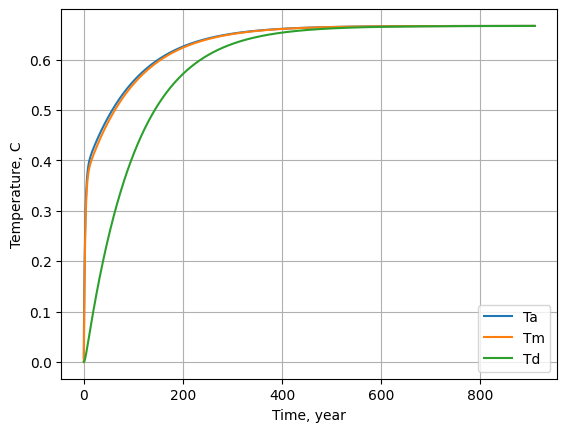

In [41]:
# gráfica
t_time = np.arange(0,t,delt)
plt.plot(t_time,y1t, label='Ta')
plt.plot(t_time,y2t, label='Tm')
plt.plot(t_time,y3t, label='Td')
plt.xlabel('Time, year')
plt.ylabel('Temperature, C')
plt.grid()
plt.legend()
plt.show()

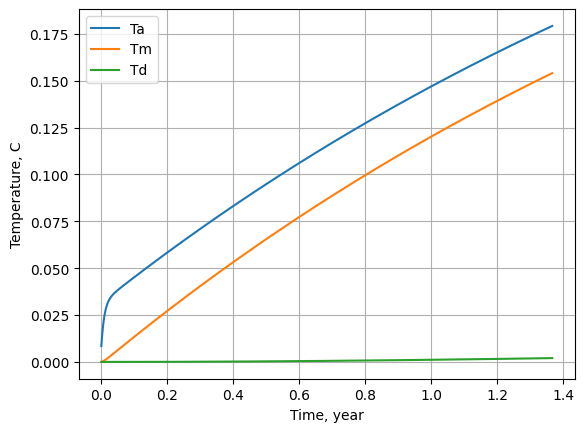

In [43]:
# gráfica
p = 500
t_time = np.arange(0,t,delt)
plt.plot(t_time[:p],y1t[:p], label='Ta')
plt.plot(t_time[:p],y2t[:p], label='Tm')
plt.plot(t_time[:p],y3t[:p], label='Td')
plt.xlabel('Time, year')
plt.ylabel('Temperature, C')
plt.grid()
plt.legend()
plt.show()